### Here we analyze the different texts on the following.
- Sequence lengths
- Sentence lengths
- Character count
- Vocalbulary size
- Entites

In [4]:
%pip install tikzplotlib
%pip install matplotlib
%pip install nltk
%pip install spacy
%python -m spacy download en_core_web_sm


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).


In [5]:
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import matplotlib.pyplot as plt
from collections import Counter
import json
from os.path import join
import tikzplotlib

nlp = spacy.load("en_core_web_sm")
nltk.download("punkt")

ImportError: cannot import name 'common_texification' from 'matplotlib.backends.backend_pgf' (c:\Users\alexa\Documents\RAG\rag\Lib\site-packages\matplotlib\backends\backend_pgf.py)

In [ ]:
import json
from os.path import join

data_path = join("data", "output.json")

with open(data_path, "r", encoding="utf-8") as f:
    data = json.load(f)

for entry in data:
    quotes_combined = ' '.join(entry.get('quote', []))
    combined_text = quotes_combined + ' ' + entry.get('description', '')
    entry['combined'] = combined_text.strip()

combined = [e["combined"] for e in data]
texts = combined

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


NameError: name 'tikzplotlib' is not defined

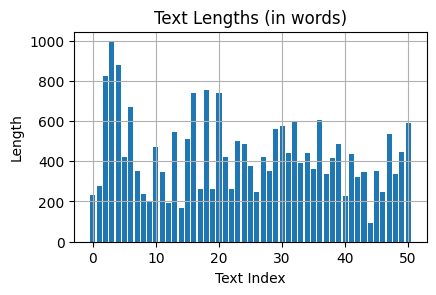

In [ ]:
nlp = spacy.load("en_core_web_sm")

nltk.download("punkt")

text_lengths = []
sentence_lengths = []
char_counts = []
vocab_sizes = []
entity_types = []

for text in texts:
    # Word tokenization and counting
    words = word_tokenize(text)
    text_lengths.append(len(words))

    # Sentence tokenization and counting words in each sentence
    sentences = sent_tokenize(text)
    sentence_lengths.append([len(word_tokenize(sentence)) for sentence in sentences])

    # Character count
    char_counts.append(len(text))

    # Vocabulary size (unique word count)
    vocab_sizes.append(len(set(words)))

    # Named Entity Recognition using spaCy
    doc = nlp(text)
    entity_types.extend([ent.label_ for ent in doc.ents])

# Visualization 1: Text Lengths (in words)
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.bar(range(len(text_lengths)), text_lengths)
plt.title('Text Lengths (in words)')
plt.xlabel('Text Index')
plt.ylabel('Length')
plt.grid(True)
tikzplotlib.save(join("plots","text_lengths.tikz"))

# Visualization 2: Average Sentence Lengths
avg_sentence_lengths = [sum(lengths) / len(lengths) if lengths else 0 for lengths in sentence_lengths]
plt.subplot(2, 2, 2)
plt.bar(range(len(avg_sentence_lengths)), avg_sentence_lengths)
plt.title('Average Sentence Lengths')
plt.xlabel('Text Index')
plt.ylabel('Average Length')
plt.grid(True)
tikzplotlib.save(join("plots","seq_lengths.tikz"))

# Visualization 3: Character Counts
plt.subplot(2, 2, 3)
plt.bar(range(len(char_counts)), char_counts)
plt.title('Character Counts')
plt.xlabel('Text Index')
plt.ylabel('Word Count')
plt.grid(True)
tikzplotlib.save(join("plots","char_counts.tikz"))

# Visualization 4: Vocabulary Sizes
plt.subplot(2, 2, 4)
plt.bar(range(len(vocab_sizes)), vocab_sizes)
plt.title('Vocabulary Sizes')
plt.xlabel('Text Index')
plt.ylabel('Size')
plt.grid(True)
tikzplotlib.save(join("plots","vocab_sizes.tikz"))

plt.tight_layout()
plt.show()

entity_counts = Counter(entity_types)

sorted_entity_counts = {k: v for k, v in sorted(entity_counts.items(), key=lambda item: item[1], reverse=True)}
labels, values = zip(*sorted_entity_counts.items())

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='blue')
plt.title('Named Entity Type Distribution')
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
tikzplotlib.save(join("plots","entity_freq.tikz"))

plt.show()

In [ ]:
print(sorted_entity_counts)

Counter({'PERSON': 507, 'DATE': 450, 'GPE': 369, 'ORG': 337, 'CARDINAL': 137, 'NORP': 122, 'WORK_OF_ART': 92, 'ORDINAL': 72, 'FAC': 30, 'LOC': 30, 'EVENT': 24, 'LANGUAGE': 20, 'PRODUCT': 13, 'TIME': 10, 'QUANTITY': 5, 'LAW': 4, 'MONEY': 2})
